In [18]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.18.0
Keras version: 3.6.0


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/Users/jacksonsorenson/Documents/Pyhton Projects/NLP Iphone Senitiment Analysis/iphone.csv')
df = df[['reviewDescription']]
df.head()

,reviewDescription
0,"Every thing is good about iPhones, there's not..."
1,"It look so fabulous, I am android user switche..."
2,I tried to flip camera while recording but no ...
3,100% genuine
4,Happy to get the iPhone 13 in Amazon offer


In [13]:
from transformers import pipeline

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment",
    framework="pt"
)

df['sentiment'] = df['reviewDescription'].apply(
    lambda x: sentiment_pipeline(str(x), truncation=True, max_length=512)[0]['label']
)

print(df[['reviewDescription', 'sentiment']])


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


                                      reviewDescription sentiment
0     Every thing is good about iPhones, there's not...   LABEL_1
1     It look so fabulous, I am android user switche...   LABEL_2
2     I tried to flip camera while recording but no ...   LABEL_0
3                                          100% genuine   LABEL_2
4            Happy to get the iPhone 13 in Amazon offer   LABEL_2
...                                                 ...       ...
3057  Useless phon never buy this heat n useless cam...   LABEL_0
3058  iam not happy with this product why because ch...   LABEL_0
3059                                         Good phone   LABEL_2
3060  While charging mobile it's getting so hot even...   LABEL_2
3061  Battery power is be very bad need to chat on d...   LABEL_0

[3062 rows x 2 columns]


In [14]:
label_mapping = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}
df['sentiment'] = df['sentiment'].map(label_mapping)


In [15]:
print(df['sentiment'].value_counts())


sentiment
Positive    1751
Negative     757
Neutral      554
Name: count, dtype: int64


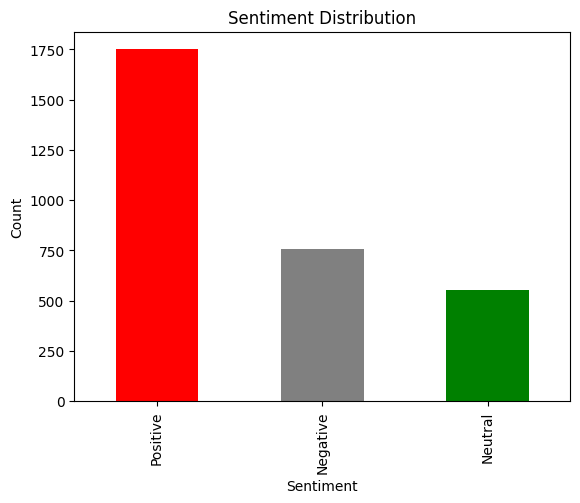

In [16]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [20]:
positive_reviews = df[df['sentiment'] == 'Positive']
print(positive_reviews.head())


                                   reviewDescription sentiment
1  It look so fabulous, I am android user switche...  Positive
3                                       100% genuine  Positive
4         Happy to get the iPhone 13 in Amazon offer  Positive
5                                           5 star 👍  Positive
6  Great Product... Nothing to say, as the Name A...  Positive


In [21]:
negative_reviews = df[df['sentiment'] == 'Negative']
print(negative_reviews.head())


                                    reviewDescription sentiment
2   I tried to flip camera while recording but no ...  Negative
16  Works just fine nothing special the camera is ...  Negative
19  My device is not working (switched off)Iam not...  Negative
21                                          Not worth  Negative
33  My phone was bent for some reason. So kindly i...  Negative


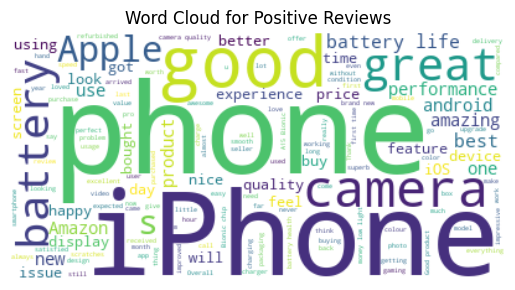

In [22]:
from wordcloud import WordCloud

positive_text = " ".join(positive_reviews['reviewDescription'])
wordcloud = WordCloud(background_color='white').generate(positive_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


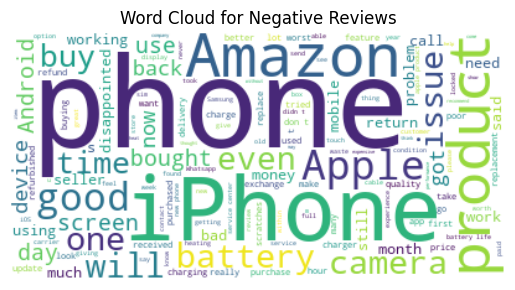

In [23]:
from wordcloud import WordCloud

Negative_text = " ".join(negative_reviews['reviewDescription'])
wordcloud = WordCloud(background_color='white').generate(Negative_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()